In [9]:
!pip install diagrams
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [10]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import APIGateway
from diagrams.aws.integration import SQS
from diagrams.onprem.client import Client
from diagrams.onprem.container import Docker
from diagrams.onprem.inmemory import Redis

with Diagram("Flask Microservice Architecture", show=False, outformat="png"):
    client = Client("Web Client")

    # API Gateway
    gateway = APIGateway("API Gateway")

    # Load Balancer Cluster
    with Cluster("Load Balanced Flask Services"):
        flask_app_1 = EC2("Flask App 1")
        flask_app_2 = EC2("Flask App 2")
        flask_services = [flask_app_1, flask_app_2]

    # Message Queue
    queue = SQS("Message Queue")

    # Docker container for services
    with Cluster("Docker Containers"):
        docker_flask = Docker("Flask Microservice")

    # Database and Cache
    db = RDS("MySQL Database")
    cache = Redis("Redis Cache")

    # Architecture diagram connections
    client >> gateway >> flask_services
    flask_services >> queue >> docker_flask
    flask_services >> db
    flask_services >> cache



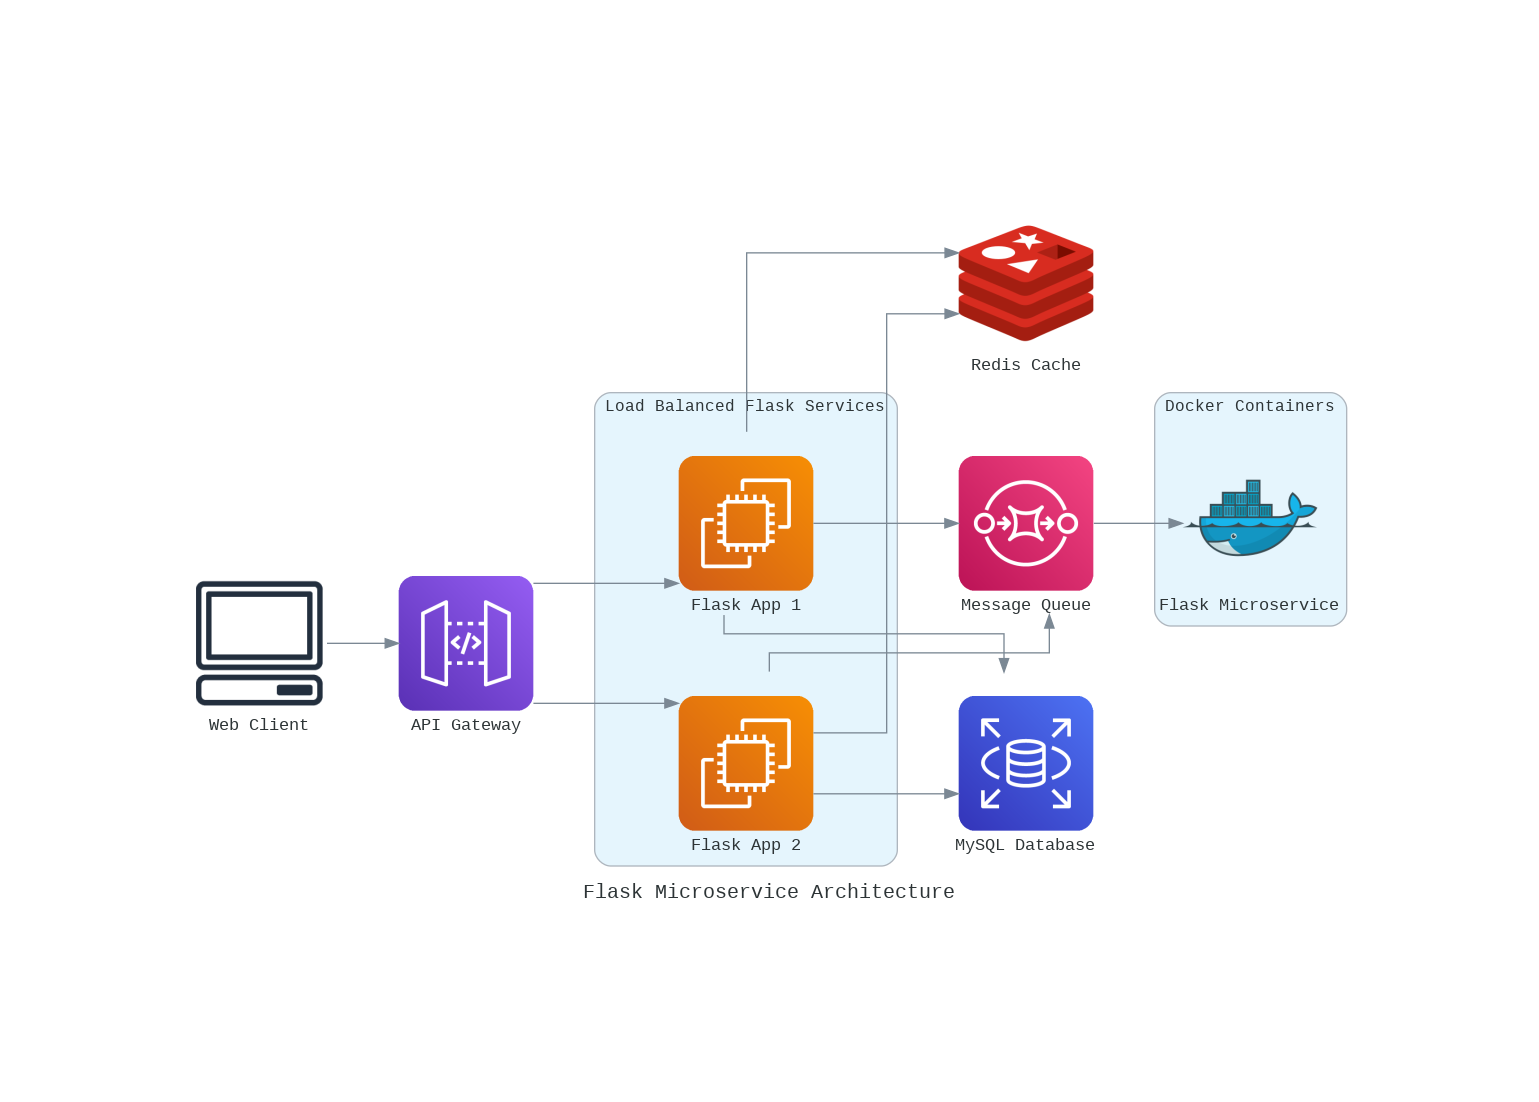

In [11]:
from PIL import Image
from IPython.display import display

# Open and display the generated image
img = Image.open("/content/flask_microservice_architecture.png")
display(img)


The Flask Microservice Architecture diagram represents a typical microservices-based architecture using Flask. Let’s break down the architecture, step by step, and explain the role of each component.

Key Components:
Client (Web or Mobile Client):

This represents users or applications interacting with the Flask microservices via the internet.
Clients can be web browsers, mobile apps, or other services sending requests to the backend.
API Gateway:

Purpose: The API Gateway acts as a single entry point for all client requests. It routes these requests to the appropriate microservice.
Role in Microservices: It abstracts the underlying microservices and handles tasks like routing, rate limiting, security, and authentication.
For instance, if a client sends a request, the API Gateway ensures the request is forwarded to the correct Flask service (microservice).
Load Balancer:

Purpose: The load balancer ensures that incoming traffic is evenly distributed across multiple Flask instances.
Scaling: If you have high traffic, running multiple Flask app instances ensures the application is scalable. The load balancer helps to manage the load by distributing requests across Flask instances (e.g., Flask App 1 and Flask App 2).
It also improves fault tolerance—if one Flask instance fails, the load balancer directs traffic to other available instances.
Flask Services (Flask App 1 and Flask App 2):

Purpose: These represent independent instances of the Flask microservice, which handle specific requests from the API Gateway.
Role in Microservices: Each instance of Flask is a stateless microservice. This could mean that each Flask service performs a specific task or has its own isolated business logic. Multiple services enable flexibility and scalability.
The Flask services process incoming HTTP requests, perform the business logic, and communicate with databases or other services as needed.
Message Queue (e.g., AWS SQS):

Purpose: A message queue allows asynchronous communication between microservices.
Role in Microservices: When a microservice needs to perform a background task (e.g., sending an email or processing a large data set), it can push the task into a message queue. Another service (e.g., a worker Flask service) picks up and processes these tasks. This decouples microservices and improves performance by offloading time-consuming tasks.
The queue ensures that if one microservice is busy, the tasks are not lost but are processed when available.
Docker Containers:

Purpose: Containers are used to encapsulate microservices, including their dependencies, ensuring they run in any environment.
Role in Microservices: Each Flask microservice can run inside its own Docker container, ensuring isolation and consistent behavior. Using Docker also makes it easy to scale up or down based on demand. Docker containers can be deployed on different servers or in the cloud.
Database (MySQL):

Purpose: The database stores persistent data, such as user information, orders, or any other business-related data.
Role in Microservices: Flask services often need to interact with databases. The database is typically shared across microservices (unless each microservice has its own database). For example, when a client requests data about a product, the Flask service fetches the data from the MySQL database and sends it back.
The database is essential for ensuring that data persists across service instances.
Cache (Redis):

Purpose: Redis is a caching layer that stores frequently accessed data in memory to reduce database load and speed up requests.
Role in Microservices: Caching is vital to improving application performance. Rather than querying the MySQL database for frequently requested information, Flask services can first check the Redis cache. If the data is in the cache, it's retrieved faster. If not, the database is queried, and the result is saved in the cache for future use.
Data Flow in the Architecture:
Client Request:

The user (client) sends a request (e.g., to retrieve user details, perform an action, etc.).
This request is routed through the API Gateway, which determines which Flask service should handle it.
Load Balancing:

The Load Balancer directs the request to one of the available Flask microservices (e.g., Flask App 1 or Flask App 2).
This ensures the traffic is distributed evenly, and each service instance is not overloaded.
Processing the Request:

The Flask service processes the request. It may:
Query the MySQL database for data.
Use the Redis cache to retrieve commonly requested data faster.
Push tasks to the message queue (e.g., send a confirmation email).
After processing, the service sends the response back through the load balancer to the API Gateway, which forwards it to the client.
Asynchronous Processing:

For background tasks or non-immediate actions, the Flask service can add messages to the queue (e.g., task processing or notifications). These tasks are processed later by other microservices or worker nodes.
Improved Performance via Caching:

If the Flask service identifies a piece of data that is frequently accessed, it can store it in Redis for quick future access, minimizing database queries.
Key Advantages of This Architecture:
Scalability:

By using a load balancer, multiple instances of the Flask service can run simultaneously. This allows horizontal scaling (adding more instances when needed).
Fault Tolerance:

If one Flask service instance fails, the load balancer will reroute traffic to the remaining healthy instances.
Separation of Concerns:

Each microservice can have a dedicated responsibility (e.g., user management, order processing). This isolation helps in better code organization, easier maintenance, and independent scaling.
Asynchronous Processing:

Tasks that don't need immediate responses (e.g., sending emails, data processing) are offloaded to a message queue. This reduces latency and improves responsiveness for users.
Caching for Performance:

Redis caching helps minimize the load on the database by storing frequently accessed data in memory, leading to faster response times.
Containerization:

Running Flask services in Docker containers provides consistency across environments (development, testing, and production) and makes deployment much more flexible.
In Summary:
This Flask microservice architecture ensures high availability, scalability, and performance by leveraging multiple Flask instances, load balancing, caching, and asynchronous task management through message queues. This design is highly modular and fits well with modern cloud-based deployments.






